In [1]:
using HierarchicalDriving
import POMDPs:initial_state
using POMDPToolbox
using Interact
using MCTS
using AutoViz
import ParticleFilters: obs_weight
import Base: ==, +, *, -, <, >, copy, Random, hash

In [2]:
HORIZON = 60
TIME_STEP = 0.3
lb_x = (AVG_HWY_VELOCITY - 5.0) * TIME_STEP * HORIZON
ub_x = (AVG_HWY_VELOCITY + 5.0) * TIME_STEP * HORIZON
p2 = SimulationMDP(0.9, 0.2, 40,
                                  HierarchicalDriving.RoadSegment((-100.0, 500.0),[0.0, LANE_WIDTH, 2.0 * LANE_WIDTH, 3.0 * LANE_WIDTH, 4.0 * LANE_WIDTH]),
                                  CarPhysicalState((0.0, 1.0 * LANE_WIDTH/2.0, AVG_HWY_VELOCITY)),
                                  (CarPhysicalState((425.0, 7.0 * LANE_WIDTH/2.0 - 0.5, AVG_HWY_VELOCITY - 0.5)),
                                   CarPhysicalState((500.0, 7.0 * LANE_WIDTH/2.0 + 0.5, AVG_HWY_VELOCITY + 0.5))),
                                  HierarchicalDriving.getFrameList() );


Interact.Options{:SelectionSlider,Int64}(Signal{Int64}(31, nactions=1),"i",31,"31",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",55=>"55",42=>"42",29=>"29",58=>"58",59=>"59"…)),Any[],Any[],true,"horizontal")

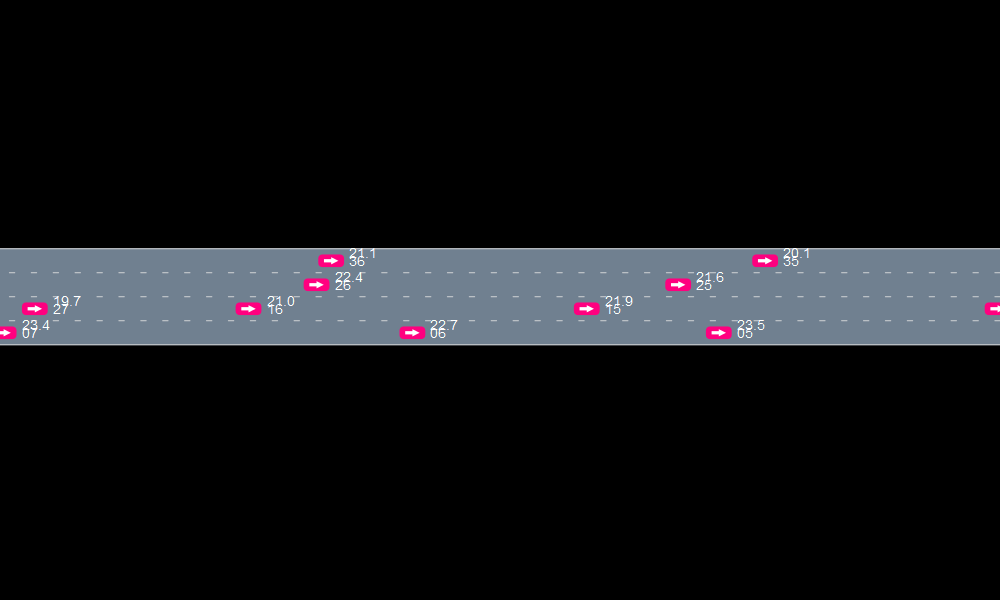

In [3]:
j=1
policy = subintentional_simulation_policy(p2)
hr = HistoryRecorder(max_steps = HORIZON, rng = MersenneTwister(j))
hist = simulate(hr, p2, policy)
@manipulate for i in 1:n_steps(hist)+1
    (p2,state_hist(hist)[i],SceneOverlay[CarVelOverlay(), CarIDOverlay()])
end

In [ ]:
solver = DPWSolver(depth=HORIZON,
                           exploration_constant=10.0,
                           n_iterations=1_500,
                           k_action=10.0,
                           alpha_action=1/10,
                           k_state=5.0,
                           alpha_state=1/10,

                          )
policy1 = solve(solver, p2)
hr1 = HistoryRecorder(max_steps = HORIZON, rng = MersenneTwister(j))
hist1 = simulate(hr1, p2, policy1)
@manipulate for i in 1:n_steps(hist1)+1
    (p2,state_hist(hist1)[i])
end